## Regression
### Ecommerce Customers Data
### Beverly Pham
### 03/28/2018

In [1]:
# Import the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy.polynomial.polynomial as poly
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib
import seaborn as sns
import pandas as pd
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [2]:
df = pd.read_csv('./ecommerce-customers.csv')

### 1. Show the first 5 rows of the dataset

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### 2. Show the description and the info on the dataset, using appropriate Pandas functions

In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


### 3. Use seaborn jointplot function to see which fields correlate well with the "Yearly Amount Spent" column. Write your findings.

/Users/user/Documents/codefellows/401/labs/data-science/ENV/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


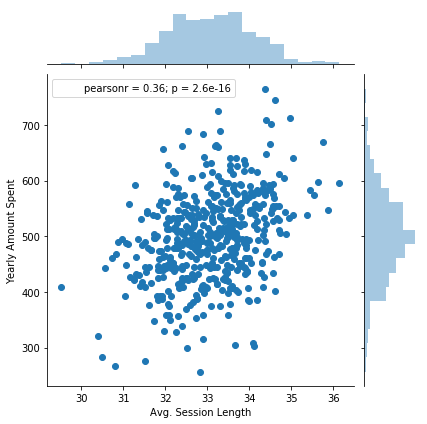

In [6]:
sns.jointplot(df['Avg. Session Length'], df['Yearly Amount Spent'])

/Users/user/Documents/codefellows/401/labs/data-science/ENV/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


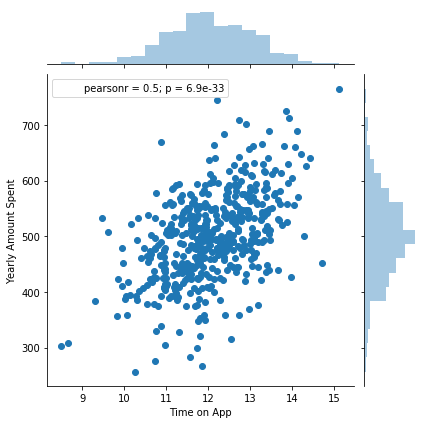

In [7]:
sns.jointplot(df['Time on App'], df['Yearly Amount Spent'])

/Users/user/Documents/codefellows/401/labs/data-science/ENV/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


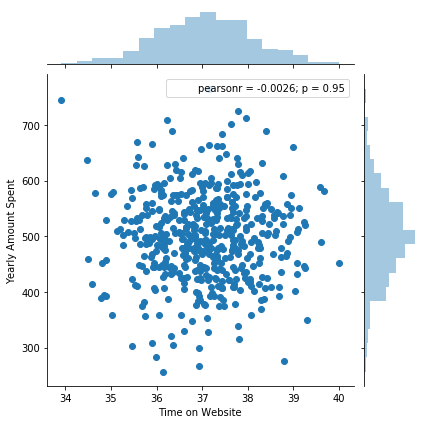

In [8]:
sns.jointplot(df['Time on Website'], df['Yearly Amount Spent'])

/Users/user/Documents/codefellows/401/labs/data-science/ENV/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


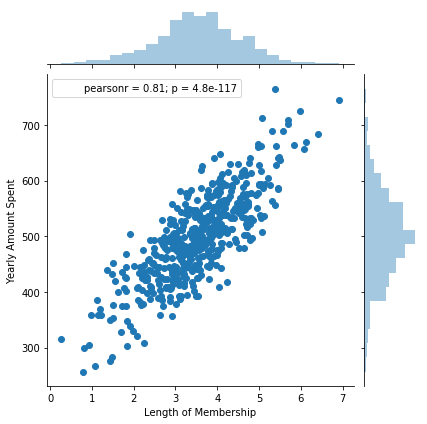

In [9]:
sns.jointplot(df['Length of Membership'], df['Yearly Amount Spent'])

#### Answer: Length of Membership correlates best with Yearly Amount Spent. Time on App has somewhat of a linear pattern also. 

### 4. Make a summary plot of feature relationships using pairplot function of Seaborn

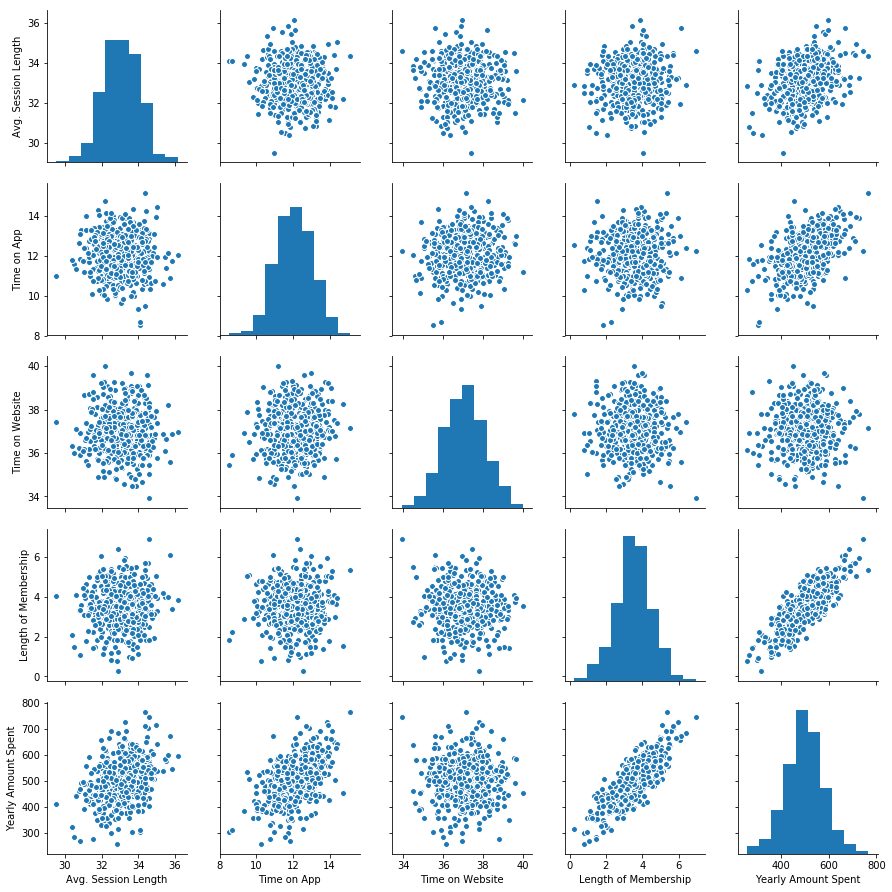

In [10]:
sns.pairplot(df)

### 5. Create two dataframes: one for the target variable ("Yearly Amount Spent"), the other - containing all the rest of numerical features

In [11]:
yearly_amount = df['Yearly Amount Spent']
yearly_amount.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [12]:
other_data = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
other_data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


### 6. Split the data into a training and test sets. Make a test set size 0.3 and random seed 123 (so the results are consistent for all students)

In [13]:
X_full, Y_full = other_data['Length of Membership'], yearly_amount

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y_full, test_size=0.3, random_state=123)

In [15]:
X_train.head()

211    3.974522
52     2.094892
178    4.131755
336    3.532862
201    4.330714
Name: Length of Membership, dtype: float64

In [16]:
Y_train.head()

211    548.518529
52     384.626572
178    537.773163
336    478.600916
201    590.562720
Name: Yearly Amount Spent, dtype: float64

### 7. Fit a regression model on the training set

Text(0.5,1,'Train Set')

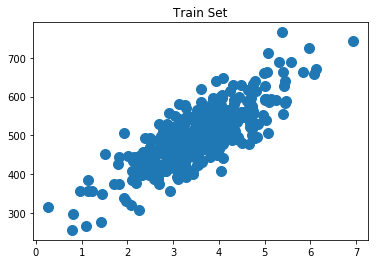

In [17]:
plt.plot(X_train, Y_train, ".", markersize=20)
plt.title("Train Set")

### 8. Print out the coefficients of the model

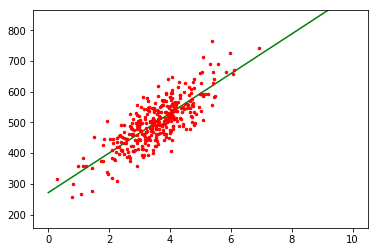

In [18]:
coefs_lin = poly.polyfit(X_train, Y_train, 1)
X_line = np.linspace(0, 10, 10000)
ffit_lin = poly.polyval(X_line, coefs_lin)

plt.ylim(min(Y_train - 100), max(Y_train + 100))
plt.plot(X_line, ffit_lin, "g")

plt.plot(X_train, Y_train, "r.", markersize=5)
plt.show()

In [19]:
coefs_lin

array([271.2757493 ,  64.69085272])

### 9. Make a prediction of the target variable from features dataframe

#### Answer: Length of Membership will correlate best with Yearly Amount Spent

### 10. Calculate the Mean Squared Error (using sklearn.metrics module)

In [20]:
mse_lin = mean_squared_error(Y_train, poly.polyval(X_train, coefs_lin))
print("MSE for a linear regressor: ", mse_lin)

MSE for a linear regressor:  2167.1366186816917


### 11. Using Seaborn distplot show the histogram of the residuals - differences between the target variable and predicted target variable

/Users/user/Documents/codefellows/401/labs/data-science/ENV/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


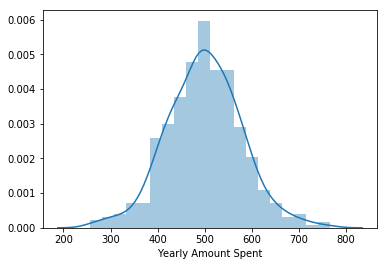

In [21]:
sns.distplot(df['Yearly Amount Spent'])

### 12. Answer the main question: How should we allocate the engineering budget between website development and app development?
#### Hint: look at the regression coefficients and contemplate their meaning

#### Answer: Time on App correlates more with Yearly Amount Spent than Time on Website. Spend more money on app development